# Exploriation and exploitation strategy:
 it's usesless ness
Exploration and exploitation deals with how an agent balances trying out new actions (exploration) versus using its current knowledge to maximize reward (exploitation). Getting the balance right is crucial for the agent to learn effectively and achieve the best possible long-term outcomes.

Exploitation: When an agent exploits, it chooses the action that it believes will yield the highest reward based on past experiences. This approach maximizes immediate reward but might miss out on discovering better actions in the long term.

Exploration: When an agent explores, it tries out new actions that may not have been previously taken or that appear suboptimal according to current knowledge. This strategy helps the agent gather more information about the environment, which can lead to better decision-making in the future.

The challenge lies in balancing these two strategies. If an agent focuses too much on exploitation, it may get stuck in a local optimum and miss better long-term strategies. Conversely, if it explores too much, it might spend too much time trying suboptimal actions and never fully capitalize on the best-known strategies.



In [ ]:
import numpy as np
import random

class EpsilonGreedyAgent:
    def __init__(self, n_actions, epsilon=0.1, alpha=0.1, gamma=0.99):
        self.n_actions = n_actions
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.q_table = np.zeros(n_actions)

    def select_action(self):
        if random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, self.n_actions)
        else:
            return np.argmax(self.q_table)

    def update_q_value(self, action, reward, next_action):
        best_next_action = np.argmax(self.q_table)
        td_target = reward + self.gamma * self.q_table[best_next_action]
        td_error = td_target - self.q_table[action]
        self.q_table[action] += self.alpha + td_error

# Example usage:
agent = EpsilonGreedyAgent(n_actions=5, epsilon=0.1)
action = agent.select_action()
agent.update_q_value(action, reward=10, next_action=2)
print(agent)


In [ ]:
import numpy as np

class UCBAgent:
    def __init__(self, n_actions, c=2):
        self.n_actions = n_actions
        self.c = c
        self.q_table = np.zeros(n_actions)
        self.action_counts = np.zeros(n_actions)
        self.total_steps = 0

    def select_action(self):
        self.total_steps += 1
        ucb_values = self.q_table + self.c * np.sqrt(np.log(self.total_steps) / (self.action_counts + 1e-5))
        return np.argmax(ucb_values)

    def update_q_value(self, action, reward):
        self.action_counts[action] += 1
        n = self.action_counts[action]
        self.q_table[action] += (1 / n) * (reward - self.q_table[action])

# Example usage:
agent = UCBAgent(n_actions=5, c=2)
action = agent.select_action()
agent.update_q_value(action, reward=10)


In [ ]:
import numpy as np

class UCBAgent:
    def __init__(self, n_actions, c=2):
        self.n_actions = n_actions
        self.c = c
        self.q_table = np.zeros(n_actions)
        self.action_counts = np.zeros(n_actions)
        self.total_steps = 0

    def select_action(self):
        self.total_steps += 1
        ucb_values = self.q_table + self.c * np.sqrt(np.log(self.total_steps) / (self.action_counts + 1e-5))
        return np.argmax(ucb_values)

    def update_q_value(self, action, reward):
        self.action_counts[action] += 1
        n = self.action_counts[action]
        self.q_table[action] += (1 / n) * (reward - self.q_table[action])

# Example usage:
agent = UCBAgent(n_actions=5, c=2)
action = agent.select_action()
agent.update_q_value(action, reward=10)


In [ ]:
import numpy as np

class SoftmaxAgent:
    def __init__(self, n_actions, tau=1.0):
        self.n_actions = n_actions
        self.tau = tau
        self.q_table = np.zeros(n_actions)

    def select_action(self):
        exp_q = np.exp(self.q_table / self.tau)
        probabilities = exp_q / np.sum(exp_q)
        return np.random.choice(self.n_actions, p=probabilities)

    def update_q_value(self, action, reward):
        self.q_table[action] += reward

# Example usage:
agent = SoftmaxAgent(n_actions=5, tau=1.0)
action = agent.select_action()
agent.update_q_value(action, reward=10)


In [ ]:
import numpy as np

class BanditEnvironment:
    def __init__(self, n_actions):
        self.probabilities = np.random.rand(n_actions)

    def pull(self, action):
        return 1 if np.random.rand() < self.probabilities[action] else 0

# Example simulation with Epsilon-Greedy Agent
env = BanditEnvironment(n_actions=5)
agent = EpsilonGreedyAgent(n_actions=5, epsilon=0.1)

n_steps = 1000
total_reward = 0

for _ in range(n_steps):
    action = agent.select_action()
    reward = env.pull(action)
    total_reward += reward
    agent.update_q_value(action, reward, None)

print("Total Reward:", total_reward)


Total Reward: 837


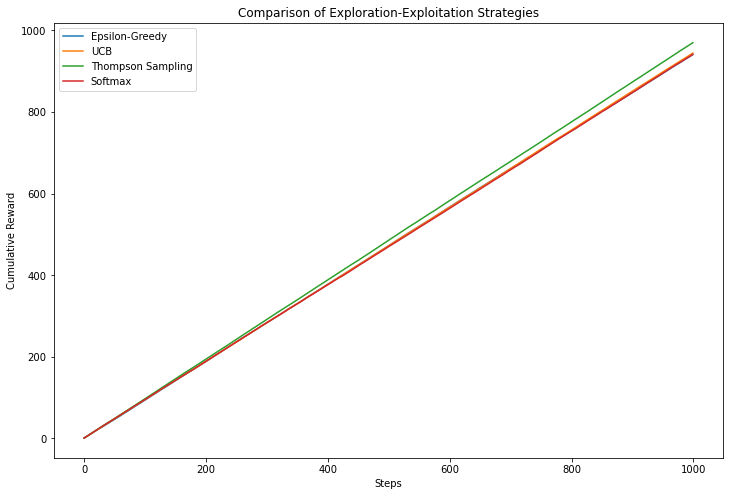

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Environment: Multi-Armed Bandit
class BanditEnvironment:
    def __init__(self, n_actions):
        self.probabilities = np.random.rand(n_actions)

    def pull(self, action):
        return 1 if np.random.rand() < self.probabilities[action] else 0

# Epsilon-Greedy Agent
class EpsilonGreedyAgent:
    def __init__(self, n_actions, epsilon=0.1, alpha=0.1, gamma=0.99):
        self.n_actions = n_actions
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.q_table = np.zeros(n_actions)

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.n_actions)
        else:
            return np.argmax(self.q_table)

    def update_q_value(self, action, reward):
        best_next_action = np.argmax(self.q_table)
        td_target = reward
        td_error = td_target - self.q_table[action]
        self.q_table[action] += self.alpha * td_error

# UCB Agent
class UCBAgent:
    def __init__(self, n_actions, c=2):
        self.n_actions = n_actions
        self.c = c
        self.q_table = np.zeros(n_actions)
        self.action_counts = np.zeros(n_actions)
        self.total_steps = 0

    def select_action(self):
        self.total_steps += 1
        ucb_values = self.q_table + self.c * np.sqrt(np.log(self.total_steps) / (self.action_counts + 1e-5))
        return np.argmax(ucb_values)

    def update_q_value(self, action, reward):
        self.action_counts[action] += 1
        n = self.action_counts[action]
        self.q_table[action] += (1 / n) * (reward - self.q_table[action])

# Thompson Sampling Agent
class ThompsonSamplingAgent:
    def __init__(self, n_actions):
        self.n_actions = n_actions
        self.alpha = np.ones(n_actions)
        self.beta = np.ones(n_actions)

    def select_action(self):
        sampled_values = np.random.beta(self.alpha, self.beta)
        return np.argmax(sampled_values)

    def update_q_value(self, action, reward):
        if reward > 0:
            self.alpha[action] += 1
        else:
            self.beta[action] += 1

# Softmax (Boltzmann Exploration) Agent (with numerical stability)
class SoftmaxAgent:
    def __init__(self, n_actions, tau=1.0):
        self.n_actions = n_actions
        self.tau = tau
        self.q_table = np.zeros(n_actions)

    def select_action(self):
        q_values = self.q_table / self.tau
        max_q = np.max(q_values)
        exp_q = np.exp(q_values - max_q)  # Subtract max_q for numerical stability
        probabilities = exp_q / np.sum(exp_q)
        return np.random.choice(self.n_actions, p=probabilities)

    def update_q_value(self, action, reward):
        self.q_table[action] += reward

# Simulation parameters
n_actions = 5
n_steps = 1000
n_episodes = 10

# Initialize environment and agents
env = BanditEnvironment(n_actions=n_actions)
agents = {
    'Epsilon-Greedy': EpsilonGreedyAgent(n_actions=n_actions, epsilon=0.1),
    'UCB': UCBAgent(n_actions=n_actions, c=2),
    'Thompson Sampling': ThompsonSamplingAgent(n_actions=n_actions),
    'Softmax': SoftmaxAgent(n_actions=n_actions, tau=1.0)
}

# Run simulations
cumulative_rewards = {name: np.zeros(n_steps) for name in agents.keys()}

for name, agent in agents.items():
    for episode in range(n_episodes):
        total_reward = 0
        for step in range(n_steps):
            action = agent.select_action()
            reward = env.pull(action)
            agent.update_q_value(action, reward)
            total_reward += reward
            cumulative_rewards[name][step] += total_reward

    cumulative_rewards[name] /= n_episodes  # Average over episodes

# Plotting cumulative rewards
plt.figure(figsize=(12, 8))
for name, rewards in cumulative_rewards.items():
    plt.plot(rewards, label=name)

plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.title('Comparison of Exploration-Exploitation Strategies')
plt.legend()
plt.show()
